<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Classification

## Icebreaker

To get into the mindset of classification, discuss **two** examples of classification with your neighbour.

If it's related to your own project, even better!

# Learning Objectives / Agenda

### Part 1: Introduction to Classification

### Part 2: Exercise

### Part 3: Stratification and Standardisation

## Introduction to Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Making iris a DataFrame

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df["target"] = df["target"].map({idx:name for idx, name in enumerate(iris.target_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


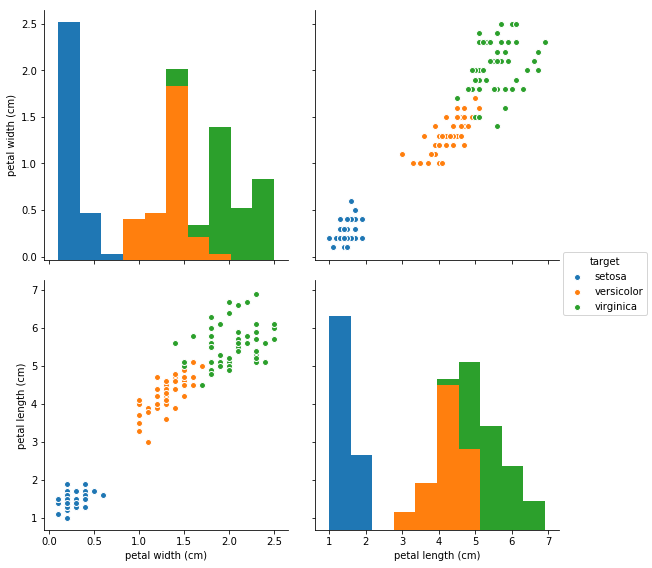

In [4]:
import seaborn as sns

sns.pairplot(df[["petal width (cm)", "petal length (cm)", "target"]], hue="target", size=4);

What class is this new point?

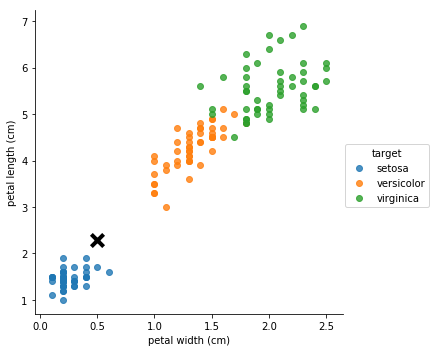

In [5]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df, fit_reg=False, hue="target");
plt.scatter([0.5], [2.3], c="k", marker="x", s=150, linewidth=4);

What about this one?

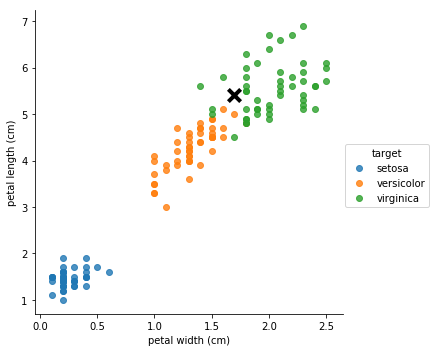

In [6]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df, fit_reg=False, hue="target");
plt.scatter([1.7], [5.4], c="k", marker="x", s=150, linewidth=4);

### Exercise

Could we construct a "classifier" manually based on this plot?

With a partner, discuss and fill in the function at the bottom of notebook 02.

# K Nearest Neighbours

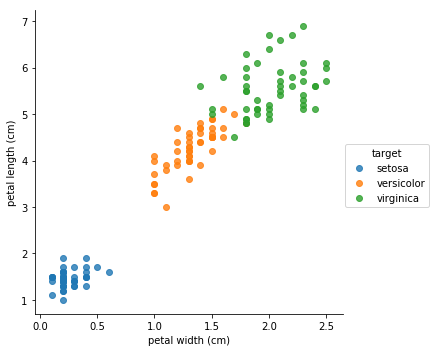

In [7]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df, fit_reg=False, hue="target");

The boundary between `versicolor` and `virginica` is hard to separate using "if-then" rules only

#### Idea

- what about looking at a new point's neighbourhood to determine its class?

- this is what KNN does

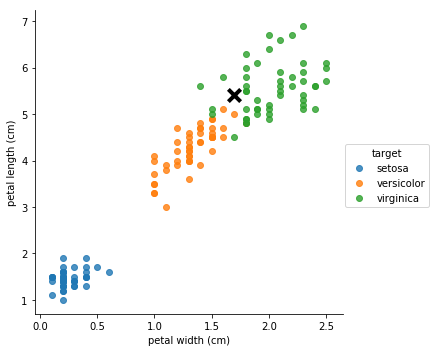

In [8]:
sns.lmplot(x="petal width (cm)", y="petal length (cm)", data=df, fit_reg=False, hue="target");
plt.scatter([1.7], [5.4], c="k", marker="x", s=150, linewidth=4);

### The algorithm

- choose a value $k$

- for a point we want to predict, find its $k$ neighbours

- the default is Euclidean distance, but there are other options

- take the most frequent class in its $k$ neighbours: that's your prediction!

What is $k$ an example of?

$k$ is another example of a **hyperparameter**.

The preferred value of $k$ is usually **odd**. Why?

What if there **is** a tie?

- flip a coin (bad)

- sort out the tie by weighting observations by distance (better!)

- this is **probably** what `scikit-learn` does (here's a discussion: [https://stats.stackexchange.com/questions/144718/how-does-scikit-learn-resolve-ties-in-the-knn-classification](https://stats.stackexchange.com/questions/144718/how-does-scikit-learn-resolve-ties-in-the-knn-classification))

- other ideas include adding/taking away neighbours until the tie is broken

## Advantages

- simple to understand

- there is no "training" as such: we have to check the neighbours on the fly

- it can also be used for regression: **how?**

## Disadvantages

- prediction can take longer for large datasets: **why?**

- it doesn't tell us anything about feature importance

- works worse with more columns (in high-dimensional space, everything is far away...)

## KNN on Iris

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.drop("target", axis=1),
                                                    df["target"],
                                                    test_size=0.3,
                                                    random_state=1)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

The "confusion matrix"

![](assets/images/confusion_matrix.png)

from [https://www.python-course.eu/confusion_matrix.php](https://www.python-course.eu/confusion_matrix.php)

In [11]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]])

In [13]:
import numpy as np
conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

array([[1.        , 0.        , 0.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ]])

# KNN for imputation

Imagine if some of the data was missing...

In [ ]:
import numpy as np

df_missing = df.copy()

np.random.seed(24)

items_to_drop = np.random.choice(range(150), size=30, replace=False)
df_missing.loc[items_to_drop, "petal width (cm)"] = np.nan
df_missing.isnull().sum()

Let's try to get them back using KNN

How would we impute missing values with KNN?

In [ ]:
X_train = df_missing.loc[df_missing["petal width (cm)"].isnull() == False,
                         ["sepal width (cm)",
                         "sepal length (cm)",
                         "petal length (cm)"]]
                   
y_train = df_missing.loc[df_missing["petal width (cm)"].isnull() == False,
                         "petal width (cm)"]

X_test = df_missing.loc[df_missing["petal width (cm)"].isnull(),
                        ["sepal width (cm)",
                         "sepal length (cm)",
                         "petal length (cm)"]]

y_test = df.loc[items_to_drop, "petal width (cm)"]

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

y_pred = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train).predict(X_test)

Let's also try the "dumb" model

In [ ]:
y_pred_mean = [y_train.mean()] * len(y_test)

In [ ]:
pd.DataFrame({"actual": y_test, "mean_prediction": y_pred_mean, "knn_prediction": y_pred}).head()

In [ ]:
from sklearn.metrics import mean_squared_error

print("Mean-value imputation RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_mean)))
print("KNN imputation RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Sometimes simpler is better!

## Exercise!